In [2]:
%matplotlib inline 

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/second_period.csv')
df

,P,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
0,P1,0,0,0,0,0,0,0,0,0,1,0
1,P2,3,0,9,0,0,10,0,0,0,0,0
2,P3,2,5,0,0,4,6,0,5,0,0,0
3,P4,1,2,0,0,0,2,1,1,0,0,0
4,P5,0,0,2,0,0,7,0,3,0,2,0
5,P6,0,0,3,6,3,0,0,9,6,11,7
6,P7,0,3,0,3,0,6,0,0,8,9,7
7,P8,0,0,3,0,3,4,0,0,9,11,7
8,P9,0,0,0,0,0,1,2,2,0,6,4
9,P10,0,3,0,0,0,5,0,6,9,0,9


In [4]:
players = list(df.columns[1:])
players

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11']

In [5]:
G = nx.DiGraph()

In [6]:
for index, row in df.iterrows():
    for player in players:
        G.add_edge(row['P'], player , weight=row[player])

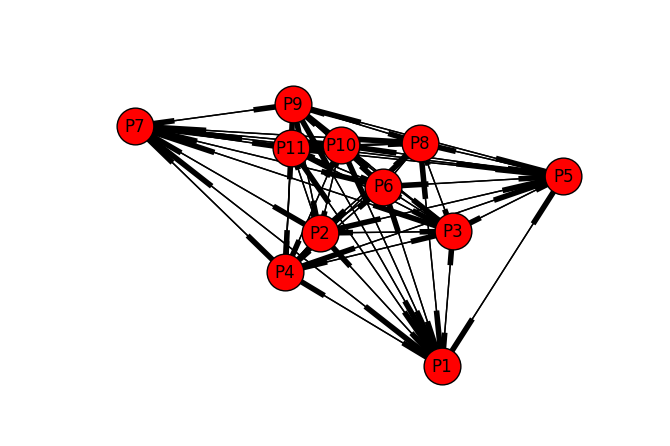

In [7]:
nx.draw(G, with_labels = True, node_size=700)
plt.show()

In [8]:
pr = nx.pagerank(G)
repr(pr)

"{'P1': 0.028252644129107055, 'P7': 0.03283914669279375, 'P11': 0.1371022218028977, 'P5': 0.053028861964833585, 'P4': 0.030681098716748685, 'P3': 0.06334868650156986, 'P8': 0.13486075164956815, 'P2': 0.05172629902078669, 'P9': 0.13656352130643906, 'P10': 0.20172608848754034, 'P6': 0.12987067972771513}"

In [9]:
kz = nx.katz_centrality_numpy(G)
repr(kz)

"{'P1': -0.245775833454336, 'P7': -0.045015840920256046, 'P11': 0.43700593891551176, 'P5': -0.10358374069460381, 'P4': -0.2723577625940191, 'P3': -0.22476946921539978, 'P8': 0.1566527437412891, 'P2': -0.16297352686276007, 'P9': 0.5345702031608598, 'P10': 0.4736053927761552, 'P6': -0.22359817504152688}"

In [10]:
# Hand-made LTC values

LTC_P1= [1,2,3,4]
LTC_P2= [1,2,3,4,6,7,10]
LTC_P3= [1,2,3,5,6,8,11]
LTC_P4= [1,2,3,4,5,6,7,8]
LTC_P5= [3,4,5,6,7,8,9,10,11]
LTC_P6= [1,2,3,4,5,6,7,8,9,10,11]
LTC_P7= [1,2,3,4,5,6,7,8,9,10,11]
LTC_P8= [1,2,3,4,5,6,7,8,9,10,11]
LTC_P9= [4,6,7,8,9,10,11]
LTC_P10= [1,2,3,4,5,6,7,8,9,10,11]
LTC_P11= [1,2,3,4,5,6,7,8,9,10,11]

ltc = {'P1':4,'P2':7,'P3':7,'P4':8,'P5':9,'P6':11,'P7':11,'P8':11,'P9':7,'P10':11,'P11':11}

In [11]:
to_dataframe = []
for player in players:
    list_attributes = []
    list_attributes.append(player)
    list_attributes.append(pr[player])
    list_attributes.append(kz[player])
    list_attributes.append(float(ltc[player])/len(players))
    to_dataframe.append(list_attributes)
    
print(to_dataframe)

[['P1', 0.028252644129107055, -0.245775833454336, 0.36363636363636365], ['P2', 0.05172629902078669, -0.16297352686276007, 0.6363636363636364], ['P3', 0.06334868650156986, -0.22476946921539978, 0.6363636363636364], ['P4', 0.030681098716748685, -0.2723577625940191, 0.7272727272727273], ['P5', 0.053028861964833585, -0.10358374069460381, 0.8181818181818182], ['P6', 0.12987067972771513, -0.22359817504152688, 1.0], ['P7', 0.03283914669279375, -0.045015840920256046, 1.0], ['P8', 0.13486075164956815, 0.1566527437412891, 1.0], ['P9', 0.13656352130643906, 0.5345702031608598, 0.6363636363636364], ['P10', 0.20172608848754034, 0.4736053927761552, 1.0], ['P11', 0.1371022218028977, 0.43700593891551176, 1.0]]


In [12]:
df_centrality = pd.DataFrame(to_dataframe, columns=['node','pr','kz','ltc'])
df_centrality

,node,pr,kz,ltc
0,P1,0.028253,-0.245776,0.363636
1,P2,0.051726,-0.162974,0.636364
2,P3,0.063349,-0.224769,0.636364
3,P4,0.030681,-0.272358,0.727273
4,P5,0.053029,-0.103584,0.818182
5,P6,0.129871,-0.223598,1.000000
6,P7,0.032839,-0.045016,1.000000
7,P8,0.134861,0.156653,1.000000
8,P9,0.136564,0.534570,0.636364
9,P10,0.201726,0.473605,1.000000


In [13]:
df_centrality.corr()

,pr,kz,ltc
pr,1.000000,0.789549,0.551886
kz,0.789549,1.000000,0.379023
ltc,0.551886,0.379023,1.000000


In [14]:
df_centrality.corr(method='spearman')

,pr,kz,ltc
pr,1.000000,0.800000,0.510466
kz,0.800000,1.000000,0.443046
ltc,0.510466,0.443046,1.000000


In [15]:
df_centrality.corr(method='kendall')

,pr,kz,ltc
pr,1.000000,0.600000,0.416125
kz,0.600000,1.000000,0.374513
ltc,0.416125,0.374513,1.000000
